In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind, chi2_contingency
import pickle

In [20]:
# Load the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB

Missing

In [21]:
# Drop unnecessary columns
df = df.drop('Person ID', axis=1)

# Fill missing values
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[non_numeric_cols] = df[non_numeric_cols].fillna('Unknown')

# Validate no missing values remain
print("\nMissing Values After Filling:\n", df.isnull().sum())

# Basic statistics
print("\nDataset Description:\n", df.describe().transpose())



Missing Values After Filling:
 Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Dataset Description:
                          count         mean          std     min      25%  \
Age                      374.0    42.184492     8.673133    27.0    35.25   
Sleep Duration           374.0     7.132086     0.795657     5.8     6.40   
Quality of Sleep         374.0     7.312834     1.196956     4.0     6.00   
Physical Activity Level  374.0    59.171123    20.830804    30.0    45.00   
Stress Level             374.0     5.385027     1.774526     3.0     4.00   
Heart Rate               374.0    70.165775     4.135676    65.0    68.00   
Daily Steps              374.0  6816.844920  

<Figure size 1400x1000 with 0 Axes>

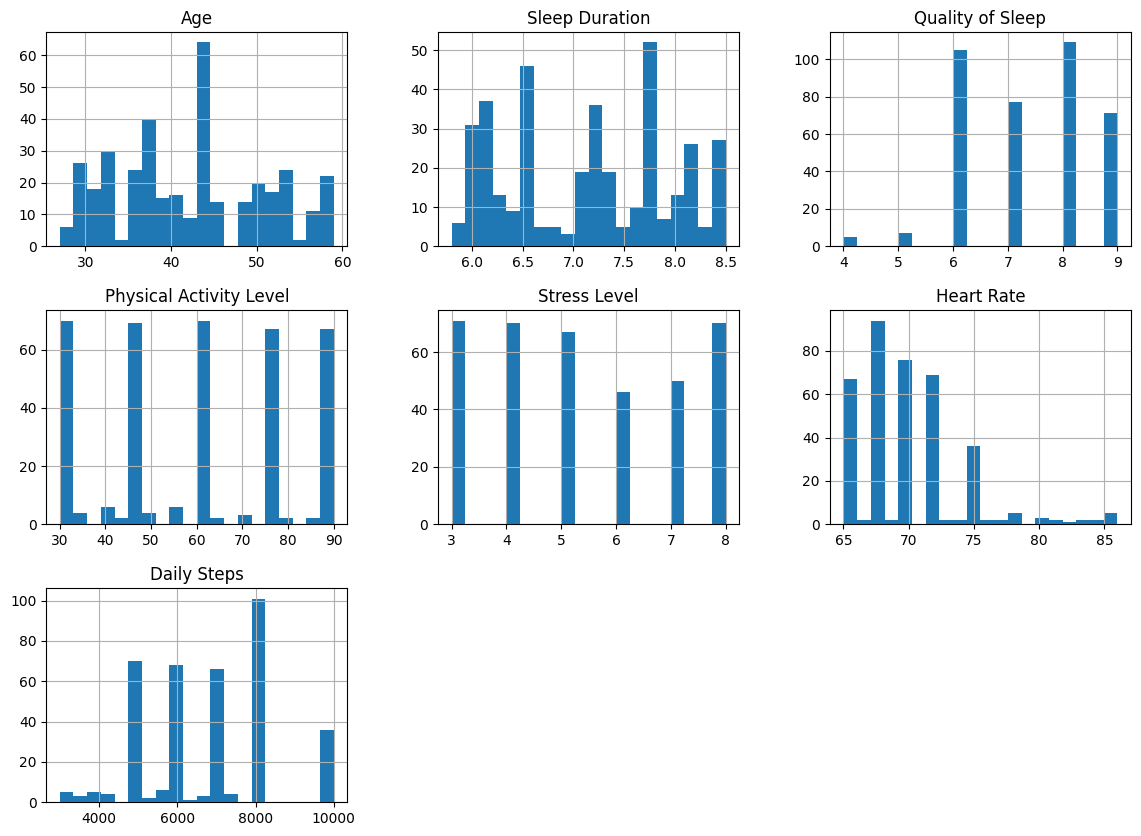

In [22]:
# Visualizations
plt.figure(figsize=(14, 10))
df.hist(bins=20, figsize=(14, 10))
plt.show()

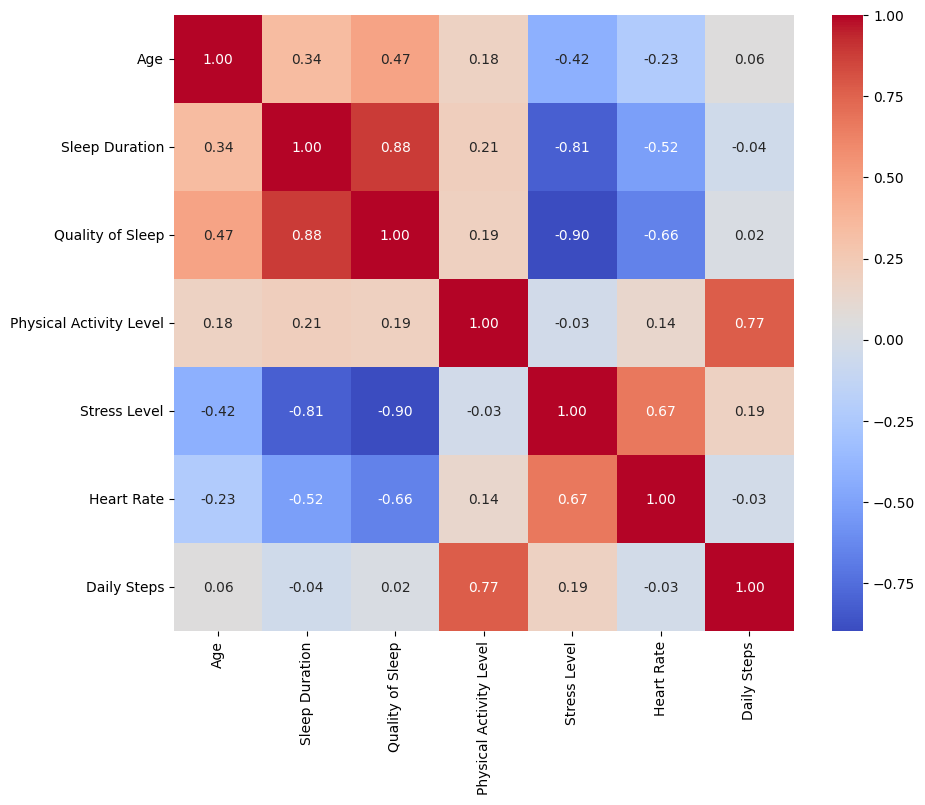

In [23]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

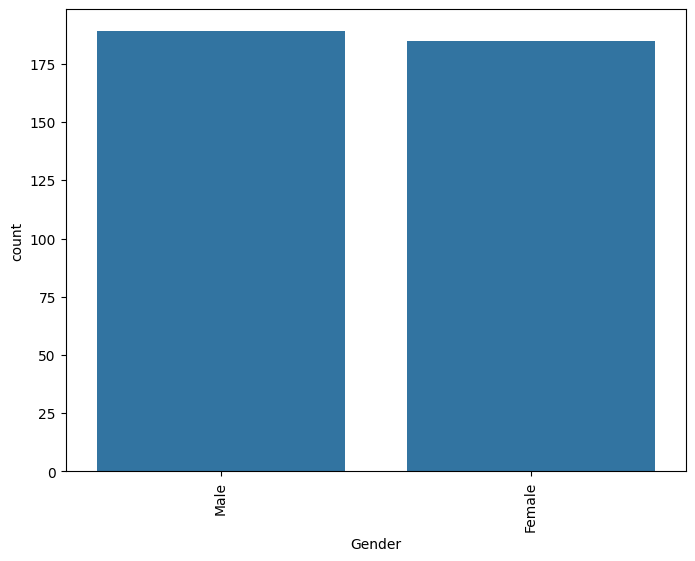

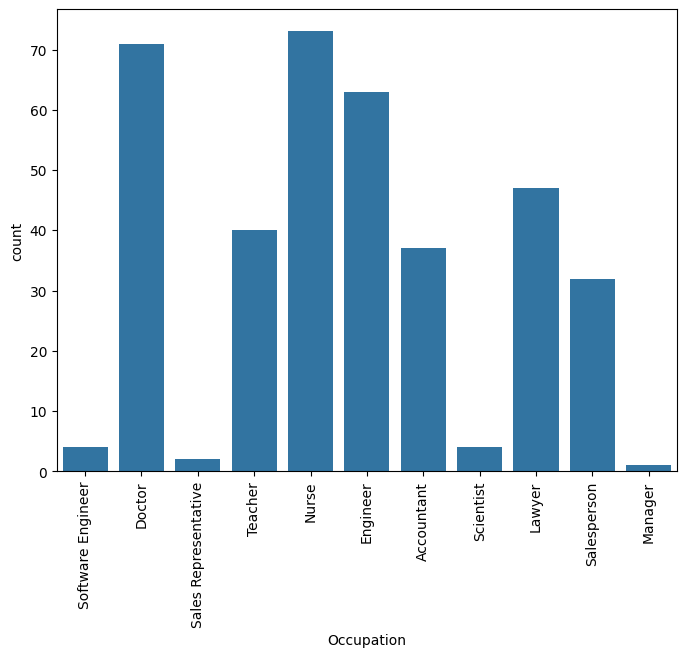

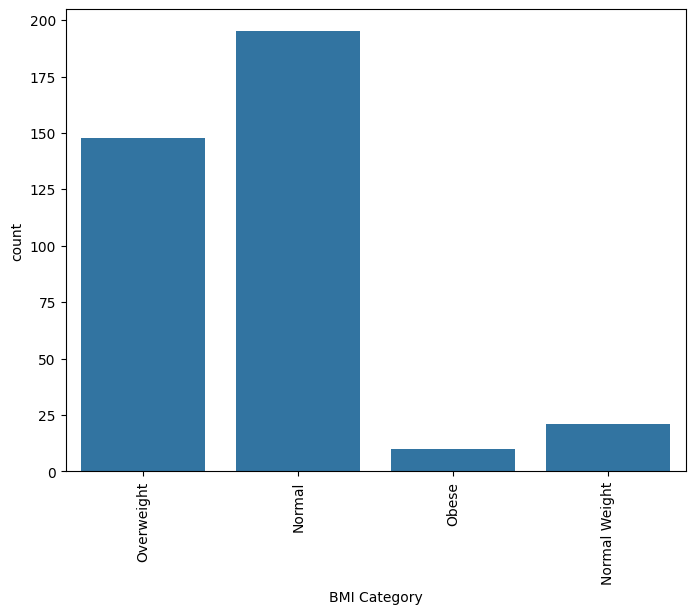

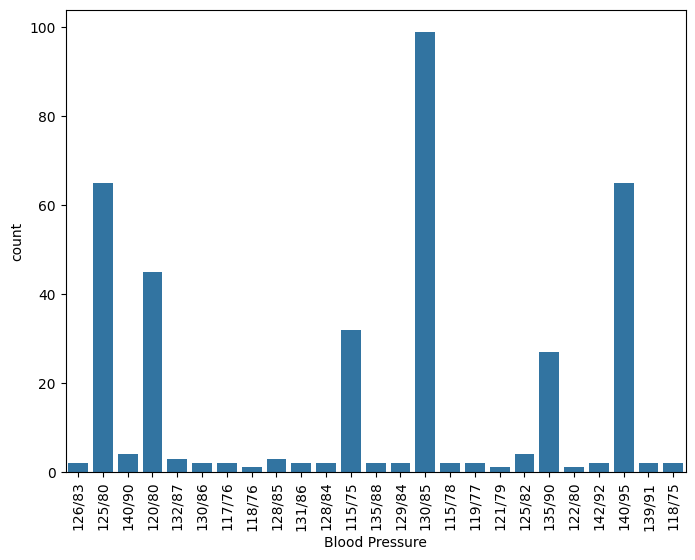

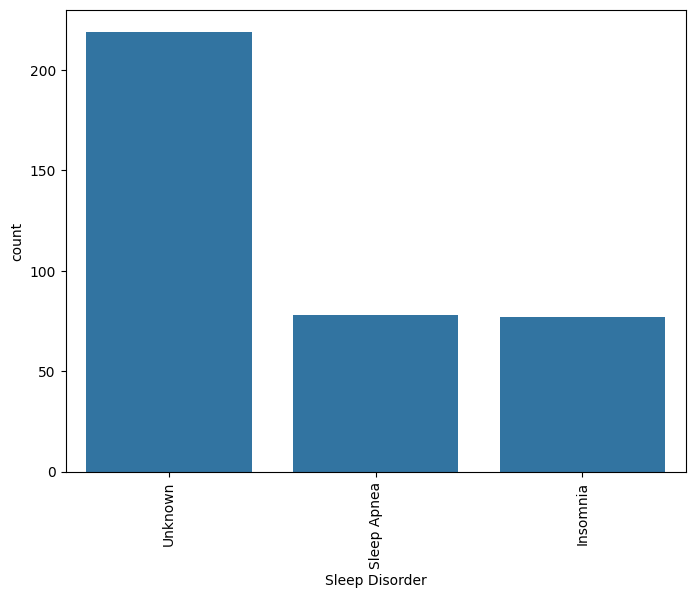

In [24]:
# Count plots for categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [25]:
# Encoding categorical variables
le = LabelEncoder()
df = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# Split dataset into features and target variable
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Handle imbalanced data with SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)


In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Logistic Regression
print("\nLogistic Regression")
lr_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.92      0.89      0.90        63
           2       0.88      0.94      0.91        64

    accuracy                           0.90       165
   macro avg       0.90      0.89      0.89       165
weighted avg       0.90      0.90      0.90       165



In [28]:
# Decision Tree
print("\nDecision Tree")
dt_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))


Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.97      0.90      0.93        63
           2       0.91      0.92      0.91        64

    accuracy                           0.92       165
   macro avg       0.91      0.92      0.91       165
weighted avg       0.92      0.92      0.92       165



In [29]:
# K-Nearest Neighbors
print("\nK-Nearest Neighbors")
knn_model = KNeighborsClassifier(n_neighbors=25).fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))


K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.91      0.83      0.87        63
           2       0.89      0.91      0.90        64

    accuracy                           0.87       165
   macro avg       0.86      0.87      0.86       165
weighted avg       0.87      0.87      0.87       165



In [30]:
# Optimize KNN using GridSearchCV
param_grid = {'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
print("Best Parameters for KNN:", knn_grid.best_params_)


Best Parameters for KNN: {'n_neighbors': 1, 'weights': 'uniform'}


In [31]:
# Random Forest
print("\nRandom Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))



Random Forest
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.97      0.92      0.94        63
           2       0.91      0.97      0.94        64

    accuracy                           0.94       165
   macro avg       0.94      0.94      0.94       165
weighted avg       0.94      0.94      0.94       165



In [32]:
# Support Vector Classifier
print("\nSupport Vector Classifier")
svc_model = SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))



Support Vector Classifier
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.95      0.89      0.92        63
           2       0.90      0.94      0.92        64

    accuracy                           0.91       165
   macro avg       0.91      0.91      0.91       165
weighted avg       0.91      0.91      0.91       165



In [33]:
# Save the best model
pickle.dump(rf_model, open('pickle.pkl', 'wb'))

# Load and test the saved model
loaded_model = pickle.load(open('pickle.pkl', 'rb'))
print("\nPrediction for Sample Input:", loaded_model.predict([[1, 1, 6, 1, 0, 0, 5, 2, 22, 17, 0]]))



Prediction for Sample Input: [1]


In [34]:
# Hypothesis Testing
print("\nHypothesis Testing")
group1 = df[df['Sleep Disorder'] == 0]['Sleep Duration']
group2 = df[df['Sleep Disorder'] == 1]['Sleep Duration']
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-Test: t-stat={t_stat:.2f}, p-value={p_value:.4f}")

contingency_table = pd.crosstab(df['Gender'], df['Sleep Disorder'])
chi2, chi2_p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2={chi2:.2f}, p-value={chi2_p:.4f}")



Hypothesis Testing
T-Test: t-stat=-3.70, p-value=0.0003
Chi-Square Test: chi2=54.31, p-value=0.0000


In [35]:
import pickle
import numpy as np

# Load the saved model
model = pickle.load(open('pickle.pkl', 'rb'))

# Function to predict new data
def predict_sleep_disorder(new_data):
    """
    Predicts whether the input data corresponds to a Sleep Disorder or not.

    Parameters:
    new_data (list): A list containing feature values in the same order as the training data.

    Returns:
    int: Prediction result (0: No Sleep Disorder, 1: Sleep Disorder).
    """
    prediction = model.predict([new_data])
    return prediction[0]

# Example input data
# Replace the below example with actual new input data in the correct format
new_input = [1, 1, 6, 1, 0, 0, 5, 2, 22, 17, 0]  # Example input

# Make a prediction
result = predict_sleep_disorder(new_input)

# Output the result
if result == 0:
    print("Prediction: No Sleep Disorder")
else:
    print("Prediction: Sleep Disorder")


Prediction: Sleep Disorder
